
**Fake News Classifier Using LSTM**


Dataset: https://www.kaggle.com/c/fake-news/data#

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/kaggle/input/fake-news/train.csv')

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.shape

(20800, 5)

In [5]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
## Drop null values

df = df.dropna()

In [7]:
df.shape

(18285, 5)

In [8]:
# Get independent features
X = df.drop('label', axis =1)

In [9]:
X.shape

(18285, 4)

In [10]:
# GEt the dependent features

y = df['label']

In [11]:
y.shape

(18285,)

In [12]:
import tensorflow as tf

2024-02-23 05:00:32.450422: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-23 05:00:32.450612: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-23 05:00:32.683590: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [13]:
tf.__version__

'2.15.0'

In [14]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [15]:
# Vocabularly Size -> unique words
voc_size = 5000

In [16]:
messages = X.copy()

In [17]:
messages['title'][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

In [18]:
messages

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [19]:
messages.reset_index(inplace=True)
messages

,index,id,title,author,text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...,...
18280,20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
18281,20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
18282,20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
18283,20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [20]:
import nltk
import spacy
import re
from nltk.corpus import stopwords

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer ##stemming purpose
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    # list comprehension
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [23]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [24]:
onehot_repr = [one_hot(words,voc_size)for words  in corpus]
onehot_repr

[[1196, 1808, 3305, 4147, 3126, 214, 179, 3943, 17, 1715],
 [615, 1066, 271, 1751, 523, 2822, 794],
 [2965, 1474, 4310, 1591],
 [4508, 3460, 2146, 4519, 4143, 4364],
 [853, 523, 4083, 1732, 398, 4247, 523, 4693, 2183, 3277],
 [1391,
  592,
  3675,
  2738,
  2138,
  2774,
  371,
  183,
  70,
  4881,
  483,
  4460,
  649,
  2061,
  794],
 [4450, 3566, 2897, 1485, 3029, 280, 2346, 3127, 2553, 2534, 383],
 [1327, 3295, 677, 294, 611, 1823, 2774, 3274, 2553, 2534, 383],
 [4148, 1163, 3102, 378, 1849, 2736, 3998, 4796, 2774, 3734],
 [978, 4175, 3885, 2994, 1541, 4620, 3590, 617],
 [1547, 1732, 3456, 2075, 37, 2351, 1446, 726, 1001, 3478, 1933],
 [4519, 3480, 3126, 2736, 2774, 611],
 [2172, 4370, 2585, 2616, 1084, 1202, 3183, 3594, 2490],
 [357, 3684, 1856, 180, 1910, 738, 905, 2553, 2534, 383],
 [2508, 959, 4858, 445, 821, 2553, 2534, 383],
 [993, 4483, 1190, 1277, 1609, 2507, 546, 4203, 3371, 4219],
 [1937, 3137, 1066],
 [1294, 4629, 1880, 2786, 2774, 3902, 3112, 794],
 [1075, 4744, 271, 45

In [25]:
print(corpus[1])
print(onehot_repr[1])

flynn hillari clinton big woman campu breitbart
[615, 1066, 271, 1751, 523, 2822, 794]


# **Embedding Representation**

In [26]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='post',maxlen=sent_length)
print(embedded_docs)

[[1196 1808 3305 ...    0    0    0]
 [ 615 1066  271 ...    0    0    0]
 [2965 1474 4310 ...    0    0    0]
 ...
 [1351 4746 2276 ...    0    0    0]
 [1226  611  954 ...    0    0    0]
 [ 349 1097 1415 ...    0    0    0]]


In [27]:
embedded_docs[1]

array([ 615, 1066,  271, 1751,  523, 2822,  794,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [28]:
## Creating model

# each and every word presented will be converted into size of 40 -> 40 features
embedding_vector_features=40 ##features representation
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
# o/p is binary so sigmoid
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256501 (1001.96 KB)
Trainable params: 256501 (1001.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [29]:
len(embedded_docs), y.shape

(18285, (18285,))

In [30]:
import numpy as np
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [31]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [33]:
### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=64)

Epoch 1/20
192/192 [==============================] - 11s 41ms/step - loss: 0.3321 - accuracy: 0.8373 - val_loss: 0.1950 - val_accuracy: 0.9218
Epoch 2/20
192/192 [==============================] - 9s 45ms/step - loss: 0.1386 - accuracy: 0.9482 - val_loss: 0.1912 - val_accuracy: 0.9205
Epoch 3/20
192/192 [==============================] - 8s 39ms/step - loss: 0.0953 - accuracy: 0.9649 - val_loss: 0.2169 - val_accuracy: 0.9196
Epoch 4/20
192/192 [==============================] - 7s 39ms/step - loss: 0.0692 - accuracy: 0.9759 - val_loss: 0.2500 - val_accuracy: 0.9175
Epoch 5/20
192/192 [==============================] - 7s 37ms/step - loss: 0.0464 - accuracy: 0.9846 - val_loss: 0.2918 - val_accuracy: 0.9145
Epoch 6/20
192/192 [==============================] - 7s 37ms/step - loss: 0.0359 - accuracy: 0.9882 - val_loss: 0.3346 - val_accuracy: 0.9120
Epoch 7/20
192/192 [==============================] - 7s 37ms/step - loss: 0.0247 - accuracy: 0.9923 - val_loss: 0.3361 - val_accuracy: 0.912

**DropOut LAyer**

The Dropout layer in neural networks serves as a regularization technique to prevent overfitting. Overfitting occurs when a model learns to memorize the training data rather than generalize well to unseen data. Dropout helps combat overfitting by randomly setting a fraction of input units to zero during training. This means that the neurons in the layer to which Dropout is applied will be randomly deactivated (set to zero) with a certain probability during each training iteration.

In [34]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
### Performance Metrics And Accuracy

y_pred =model.predict(X_test)

189/189 [==============================] - 2s 7ms/step


In [36]:
y_pred=np.where(y_pred > 0.5, 1,0) ##AUC ROC Curve

The AUC-ROC curve (Area Under the Receiver Operating Characteristic Curve) is a performance evaluation metric used to assess the performance of a binary classification model. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.

The AUC-ROC curve is created by varying the decision threshold of the classifier and calculating the TPR and FPR at each threshold. The area under this curve represents the model's ability to distinguish between positive and negative classes. A higher AUC value indicates better discrimination, with an AUC of 1 representing a perfect classifier, while an AUC of 0.5 represents a random classifier.


189/189 [==============================] - 1s 7ms/step


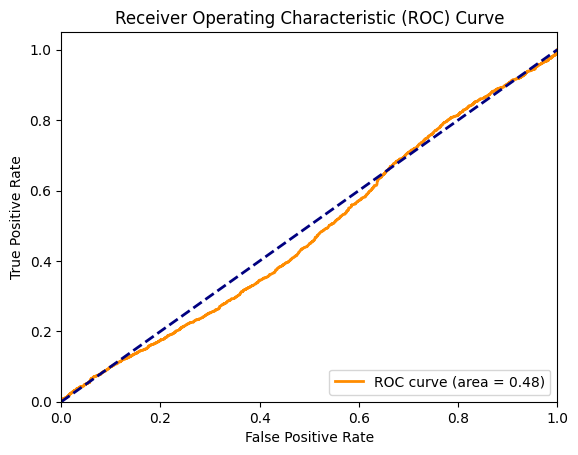

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_test contains the true labels for the test set
# Assuming X_test contains the test data

# Predict probabilities on the test set
y_pred_proba = model.predict(X_test)

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [39]:
confusion_matrix(y_test, y_pred)

array([[   0, 3419],
       [   7, 2609]])

In [40]:
accuracy_score(y_test,y_pred)

0.4323115161557581

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3419
           1       0.43      1.00      0.60      2616

    accuracy                           0.43      6035
   macro avg       0.22      0.50      0.30      6035
weighted avg       0.19      0.43      0.26      6035

